### Indice
* [ Standard Librarys](#1)
    <br>

* [Dataset](#2)
    * [Hot encoding](#2.1)
    * [split data](#2.2)
    <br>
    <br>
    
* [Read_hyperparamas Random Forest](#3)

    <br>

* [Feature Importance](#4)
    <br>
    
    * [Feature importance with random Forest](#4.1)
    * [Feature importance mlxtend](#4.2)
    * [Feature importance sklearn](#4.3)

### Standard Librarys <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import *

### Dataset <a class="anchor" id="2"></a>

In [2]:
df = pd.read_csv('../data/bank-additional-full.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Hot encoding <a class="anchor" id="2.1"></a>

In [3]:
#===============One Hot Encoding=======================#
df=pd.get_dummies(data=df, drop_first=True)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


### split data <a class="anchor" id="2.2"></a>

In [4]:
X,y =df.drop('y_yes',axis=1).values, df['y_yes'].values

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12,stratify=y)

### Read_hyperparamas Random Forest <a class="anchor" id="3"></a>

In [6]:
#read_hyperameters
RandomForest_hyperparameter = read_hyperameter_json('../best_params_models/random_forest_params.json')

Hyperameter:   {'n_estimators': 100, 'max_depth': 13, 'max_features': 0.8986731239446424}


## Feature Importance <a class="anchor" id="4"></a>

### Feature importance with random Forest <a class="anchor" id="4.1"></a>

In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(**RandomForest_hyperparameter)
model_rf.fit(X_train,y_train)

print('train Accuracy',np.mean(model_rf.predict(X_train) == y_train)*100)
print('test Accuracy',np.mean(model_rf.predict(X_test) == y_test)*100)

train Accuracy 98.03683535083763
test Accuracy 91.48660678158129
Wall time: 8.54 s


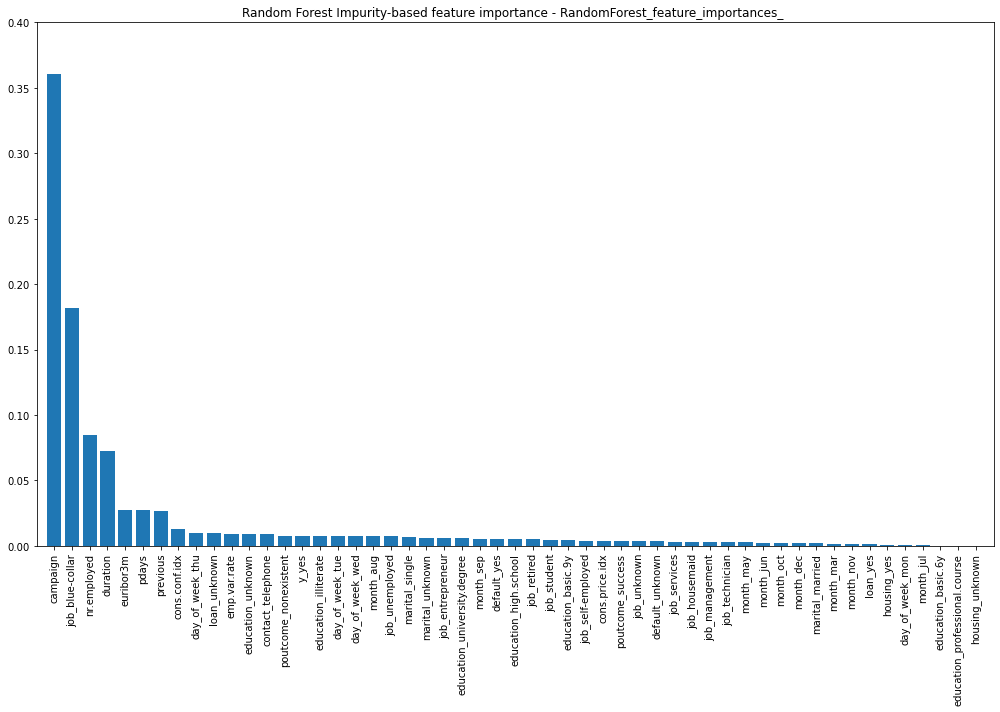

In [8]:
importance_vals = model_rf.feature_importances_
indices = np.argsort(importance_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest Impurity-based feature importance - RandomForest_feature_importances_ ')
plt.bar(range(X_train.shape[1]), importance_vals[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.4])
plt.tight_layout()
plt.savefig('importance_feature/importance_feature.pdf')
plt.show()

### Feature importance mlxtend <a class="anchor" id="4.2"></a>

In [9]:
%%time
from mlxtend.evaluate import feature_importance_permutation

imp_vals, imp_all = feature_importance_permutation(
    predict_method=model_rf.predict,
    X = X_test,
    y = y_test,
    metric='accuracy',
    num_rounds=50,
    seed = 0)

Wall time: 4min 8s


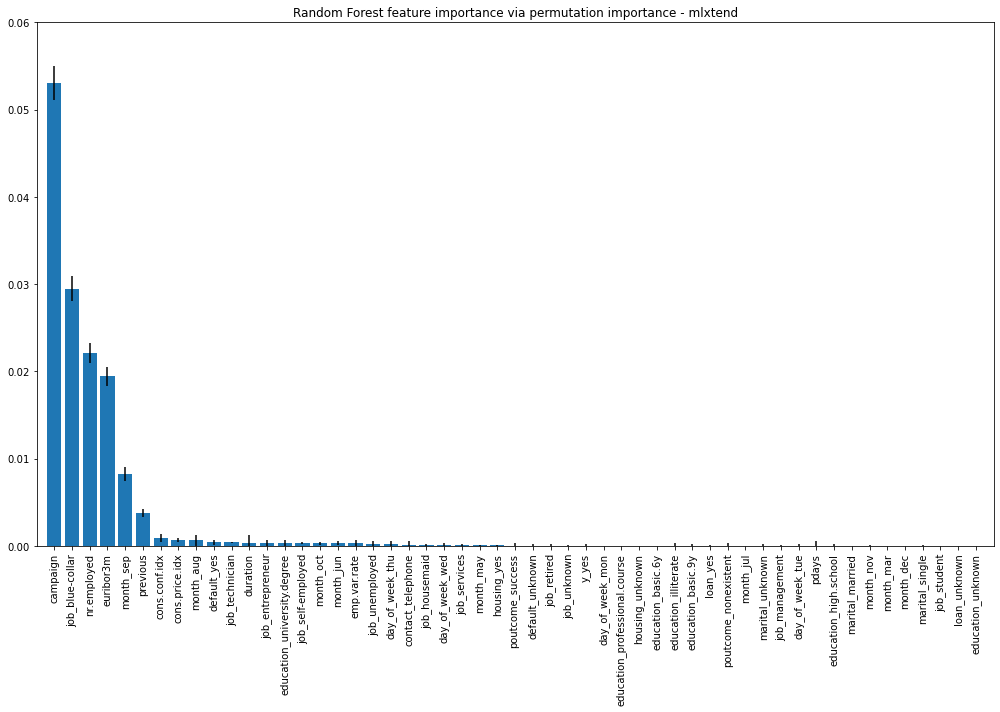

In [10]:
std = np.std(imp_all, axis =1)
indices = np.argsort(imp_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest feature importance via permutation importance - mlxtend')
plt.bar(range(X_train.shape[1]), imp_vals[indices],yerr = std[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.06])
plt.tight_layout()
plt.savefig('importance_feature/importance_feature_2.pdf')
plt.show()

### Feature importance sklearn <a class="anchor" id="4.3"></a>

In [11]:
%%time
from sklearn.inspection import permutation_importance

result = permutation_importance(
    estimator=model_rf,
    X = X_test,
    y = y_test,
    scoring='accuracy',
    n_repeats=50,
    random_state=12
)

Wall time: 4min 5s


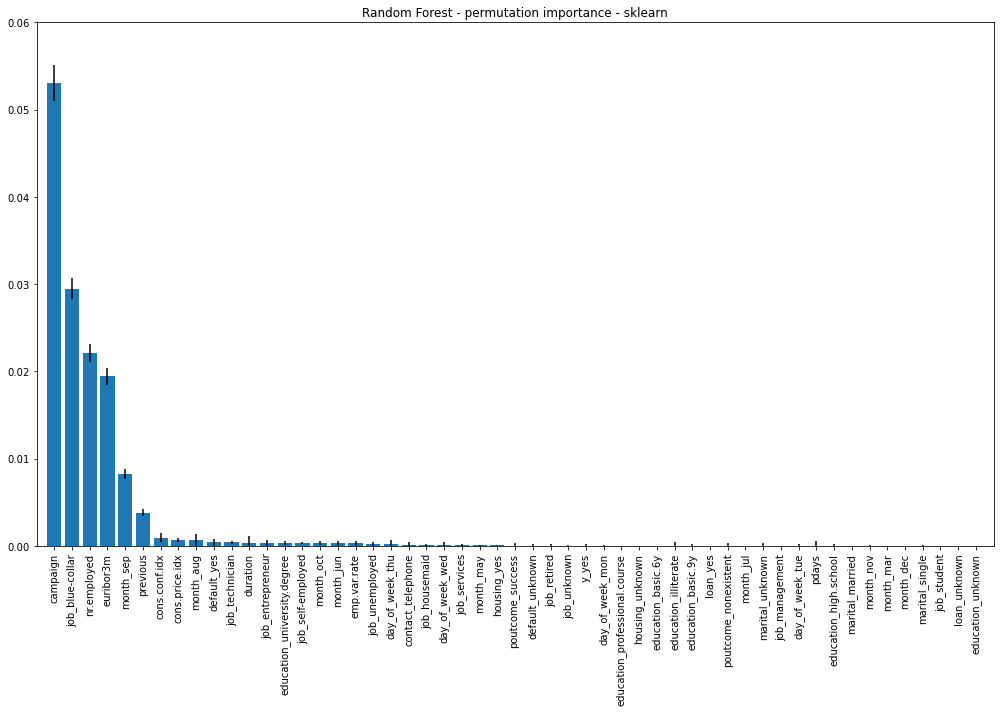

In [12]:
std = np.std(result.importances, axis =1)
indices = np.argsort(imp_vals)[::-1] #ordenar

#plot
plt.figure(figsize=(14,10))
plt.title('Random Forest - permutation importance - sklearn')
plt.bar(range(X_train.shape[1]), imp_vals[indices],yerr = std[indices])

plt.xticks(range(X_train.shape[1]), df.columns[1:][indices], rotation = 90)
plt.xlim([-1,X_train.shape[1]])
plt.ylim([0,0.06])
plt.tight_layout()
plt.savefig('importance_feature/importance_feature_3.pdf')
plt.show()